In [158]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer

In [159]:
df = pd.read_csv('train.csv')

df.columns.str.match('Unnamed')

df=df.loc[:, ~df.columns.str.match('Unnamed')]
# df['Age'] = pd.to_numeric(df['Age'])
df.head()
# df['Age'] = df['Age'].apply(pd.to_numeric)
# df['Age'] = df['Age'].astype('int') Can't convert NaN to int
# df.dtypes

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [160]:
Age = df.iloc[:,4:5]
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer = imputer.fit(Age.iloc[:,:])
Age.iloc[:,:] = imputer.transform(Age.iloc[:,:])
# df['Age'].fillna(df['Age'].mean)
df['Age'] = Age
print(df['Age'].head())

C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


In [161]:
df['Sex'] = df['Sex'].astype('str')
for i, gender in df.iterrows():
    if df.loc[i,'Sex'] == 'male':
        df.loc[i,'Sex']=1
    else:
        df.loc[i,'Sex'] = 0
# print(df['Sex'])
print(df.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  Survived  
0    1  22.0      1      0         A/5 21171   7.2500   NaN        S         0  
1    0  38.0      1      0          PC 17599  71.2833   C85        C         1  
2    0  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S         1  
3    0  35.0      1      0            113803  53.1000  C123        S         1  
4    1  35.0      0      0            373450   8.0500   NaN        S         0  


In [162]:
df['Age'] = df['Age'].astype('int64')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,0


In [163]:
df['Cabin'].isnull().sum()

687

In [164]:
df['Fare'].max()

512.3292

In [165]:
df['Age'].max()

80

In [166]:
from sklearn import preprocessing
Ages = df.iloc[:,4:5].values
minmaxscalar_as = preprocessing.MinMaxScaler(feature_range=(0,1))
f_scale =  minmaxscalar_as.fit_transform(Ages)
df['Age'] = f_scale

Fares = df.iloc[:,8:9].values
minmaxscalar_as = preprocessing.MinMaxScaler(feature_range=(0,1))
fa_scale =  minmaxscalar_as.fit_transform(Fares)
df['Fare'] = fa_scale
print(df.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex     Age  SibSp  Parch            Ticket      Fare Cabin Embarked  \
0    1  0.2750      1      0         A/5 21171  0.014151   NaN        S   
1    0  0.4750      1      0          PC 17599  0.139136   C85        C   
2    0  0.3250      0      0  STON/O2. 3101282  0.015469   NaN        S   
3    0  0.4375      1      0            113803  0.103644  C123        S   
4    1  0.4375      0      0            373450  0.015713   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  


In [167]:
df.rename(columns={"Sex":"Male"},inplace=True)

In [168]:
df['Embarked'] = df['Embarked'].astype('str')
from sklearn.preprocessing import LabelEncoder
dfle = df
le = LabelEncoder()
dfle.Embarked = le.fit_transform(dfle.Embarked)
dfle.Pclass = le.fit_transform(dfle.Pclass)
dfle.Male = le.fit_transform(dfle.Male)
dfle.head()

,PassengerId,Pclass,Name,Male,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,2,"Braund, Mr. Owen Harris",1,0.2750,1,0,A/5 21171,0.014151,NaN,2,0
1,2,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.4750,1,0,PC 17599,0.139136,C85,0,1
2,3,2,"Heikkinen, Miss. Laina",0,0.3250,0,0,STON/O2. 3101282,0.015469,NaN,2,1
3,4,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.4375,1,0,113803,0.103644,C123,2,1
4,5,2,"Allen, Mr. William Henry",1,0.4375,0,0,373450,0.015713,NaN,2,0


In [169]:
X = dfle[['PassengerId','Pclass','Name','Male','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]
Y = dfle['Survived']

In [170]:
PClass=pd.get_dummies(df['Pclass'],prefix='Pclass',drop_first=True)
df=pd.concat([df,PClass],axis=1)
df.drop(['Pclass'],axis=1,inplace=True)
df.head()

,PassengerId,Name,Male,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Pclass_1,Pclass_2
0,1,"Braund, Mr. Owen Harris",1,0.2750,1,0,A/5 21171,0.014151,NaN,2,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.4750,1,0,PC 17599,0.139136,C85,0,1,0,0
2,3,"Heikkinen, Miss. Laina",0,0.3250,0,0,STON/O2. 3101282,0.015469,NaN,2,1,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.4375,1,0,113803,0.103644,C123,2,1,0,0
4,5,"Allen, Mr. William Henry",1,0.4375,0,0,373450,0.015713,NaN,2,0,0,1


In [171]:
Embarked=pd.get_dummies(df['Embarked'],prefix='Embarked',drop_first=True)
df=pd.concat([df,Embarked],axis=1)
df.drop(['Embarked'],axis=1,inplace=True)
df

,PassengerId,Name,Male,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Pclass_1,Pclass_2,Embarked_1,Embarked_2,Embarked_3
0,1,"Braund, Mr. Owen Harris",1,0.2750,1,0,A/5 21171,0.014151,NaN,0,0,1,0,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.4750,1,0,PC 17599,0.139136,C85,1,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",0,0.3250,0,0,STON/O2. 3101282,0.015469,NaN,1,0,1,0,1,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.4375,1,0,113803,0.103644,C123,1,0,0,0,1,0
4,5,"Allen, Mr. William Henry",1,0.4375,0,0,373450,0.015713,NaN,0,0,1,0,1,0
5,6,"Moran, Mr. James",1,0.3625,0,0,330877,0.016510,NaN,0,0,1,1,0,0
6,7,"McCarthy, Mr. Timothy J",1,0.6750,0,0,17463,0.101229,E46,0,0,0,0,1,0
7,8,"Palsson, Master. Gosta Leonard",1,0.0250,3,1,349909,0.041136,NaN,0,0,1,0,1,0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0.3375,0,2,347742,0.021731,NaN,1,0,1,0,1,0
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",0,0.1750,1,0,237736,0.058694,NaN,1,1,0,0,0,0


In [172]:
df.insert(15,"Survivedd",df["Survived"])
df=df.drop(columns=["Survived"]).rename(columns={"Survivedd":"Survived"})
df.head()

,PassengerId,Name,Male,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Embarked_1,Embarked_2,Embarked_3,Survived
0,1,"Braund, Mr. Owen Harris",1,0.2750,1,0,A/5 21171,0.014151,NaN,0,1,0,1,0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.4750,1,0,PC 17599,0.139136,C85,0,0,0,0,0,1
2,3,"Heikkinen, Miss. Laina",0,0.3250,0,0,STON/O2. 3101282,0.015469,NaN,0,1,0,1,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.4375,1,0,113803,0.103644,C123,0,0,0,1,0,1
4,5,"Allen, Mr. William Henry",1,0.4375,0,0,373450,0.015713,NaN,0,1,0,1,0,0


In [183]:
df.drop(['Name','Ticket','Cabin'],axis=1)
new_da = df.to_csv('new_data.csv',index=False)
df.columns

KeyError: "['Name' 'Ticket' 'Cabin'] not found in axis"

## Everything 79% Accuracy

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df[['Male', 'Age', 'SibSp', 'Parch','Fare', 'Pclass_1', 'Pclass_2', 'Embarked_1','Embarked_2', 'Embarked_3']]
y = df['Survived']
logisticRegr = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0)
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)

print(score)

0.7937219730941704


C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [175]:
logisticRegr.coef_

array([[-2.43365946, -1.55012383, -0.27314435, -0.00415343,  0.8232466 ,
        -0.42084053, -1.51746141,  0.00569718, -0.35333935,  0.20600584]])

In [176]:
['Male', 'Age', 'SibSp', 'Parch','Fare', 'Pclass_1', 'Pclass_2', 'Embarked_1','Embarked_2', 'Embarked_3']

['Male',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Pclass_1',
 'Pclass_2',
 'Embarked_1',
 'Embarked_2',
 'Embarked_3']

In [177]:
df.columns

Index(['PassengerId', 'Name', 'Male', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Embarked_1', 'Embarked_2',
       'Embarked_3', 'Survived'],
      dtype='object')

## Grid Search Hyprerparam

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
modelgb = GradientBoostingClassifier()
modelgb.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [139]:
y_pred = model.predict(x_test)

In [140]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.6233183856502242

In [135]:
params={
 "learning_rates" : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 "n_estimators" : [1, 2, 4, 8, 16, 32, 64, 100, 200],
 "max_depth" : [1,2,4,8,10,20],
 "min_samples_split":[0.1,0.2,0.3,0.4],
}

from sklearn.model_selection import RandomizedSearchCV

random_search=RandomizedSearchCV(modelgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter learning_rates for estimator GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=0.4,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
random_search.best_estimator_

# Spearman Corelation matrix

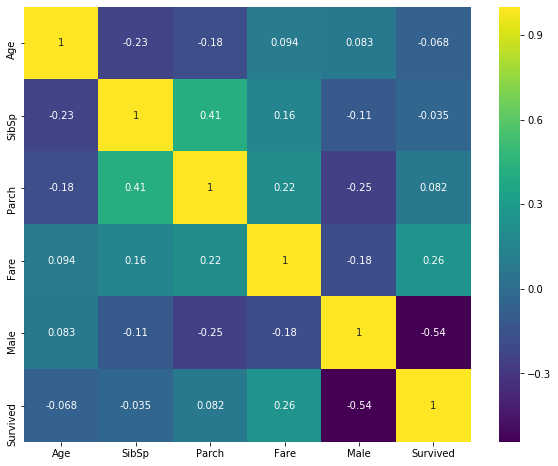

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
d = df[['Age', 'SibSp', 'Parch','Fare','Male','Survived']]
plt.figure(figsize=(10,8))
sns.heatmap(d.corr(), annot=True, cmap='viridis')

# Univariate Selection

In [79]:

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df[['Male', 'Age', 'SibSp', 'Parch','Fare', 'Pclass_1', 'Pclass_2', 'Embarked_1','Embarked_2', 'Embarked_3']] #independent columns
y = df['Survived'] #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

        Specs      Score
0        Male  92.702447
6    Pclass_2  41.553071
3       Parch  10.097499
4        Fare   8.819172
5    Pclass_1   6.160767
8  Embarked_2   5.984840
9  Embarked_3   3.210526
2       SibSp   2.581865
1         Age   0.293231
7  Embarked_1   0.010847


# Feature importance

C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.02451248 0.24794444 0.04068394 0.03830121 0.23427154 0.01790044
 0.09106398 0.00904404 0.29565616 0.00062177]


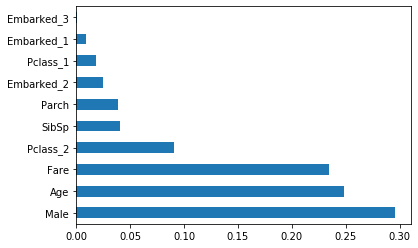

In [80]:
import pandas as pd
import numpy as np
X = df[['Embarked_2', 'Age', 'SibSp', 'Parch','Fare', 'Pclass_1', 'Pclass_2', 'Embarked_1','Male', 'Embarked_3']]
y = df['Survived']  #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Only Male 78.0% Accuracy
### male,sibsp,fare 78.4%
### ALL 79.3

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df[['Embarked_2', 'Age', 'SibSp', 'Parch','Fare', 'Pclass_1', 'Pclass_2', 'Embarked_1','Male', 'Embarked_3']]
y = df['Survived']
logisticRegr = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0)
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(predictions, y_test)

print(score)

C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## GridSearchCV

In [1]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import GridSearchCV
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
X = df[['Embarked_2', 'Age', 'SibSp', 'Parch','Fare', 'Pclass_1', 'Pclass_2', 'Embarked_1','Male', 'Embarked_3']]
y = df['Survived']  #target column i.e price range

best_model = clf.fit(X, y)

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

NameError: name 'LogisticRegression' is not defined

### Changing Hyperparameters gives 80.2% accuracy

In [69]:
# Accuracy og grid search params
acc = clf.best_score_
clf.pa
acc

0.7946127946127947

In [70]:
y_predict = best_model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8026905829596412

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       139
           1       0.74      0.73      0.73        84

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[118,  21],
       [ 23,  61]], dtype=int64)

## XG Boost

In [150]:
from xgboost import XGBClassifier
classifer = XGBClassifier()
classifer.fit(x_train,y_train)

y_predict = classifer.predict(x_test)
# confusion_matrix(y_test,y_predict)

In [151]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8565022421524664

In [152]:
test = pd.read_csv("test.csv")
test
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [156]:
x_t = test[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin', 'Embarked']]

In [157]:
y_t = classifer.predict(x_t)
y_t

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Name, Sex, Ticket, Cabin, Embarked

## Hyperparameter for XgBoost using RandomizedSearchCV

In [424]:
## Hyper Parameter Optimization

params={
 "max_depth"        : [1,3,5,7,9],
 "n_estimators": [10, 50, 100, 150, 200, 500],
    "booster" : ['gbtree','gblinear'],
    "learning_rate":[0.1, 0.02, 0.2]
}

In [425]:
from sklearn.model_selection import RandomizedSearchCV

random_search=RandomizedSearchCV(classifer,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
          

In [426]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [427]:
random_search.best_params_

{'n_estimators': 150,
 'max_depth': 1,
 'learning_rate': 0.2,
 'booster': 'gbtree'}

In [428]:
hclass = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [430]:
hclass.fit(x_train,y_train)

y_predict = hclass.predict(x_test)
# confusion_matrix(y_test,y_predict)

In [431]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8475336322869955

# NEW


In [6]:
import pandas as pd
df = pd.read_csv('train.csv')
df.columns.str.match('Unnamed')
df=df.loc[:, ~df.columns.str.match('Unnamed')]
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [8]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
df = df.drop(['Ticket', 'Cabin'], axis=1)

In [12]:
combine = [df]

In [13]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [14]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Mr


In [15]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

#     df['prod_type'] = df['prod_type'].replace({'respon':'responsive', 'r':'responsive'})
    dataset['Title'] = dataset['Title'].replace({'Mlle': 'Miss'})
    dataset['Title'] = dataset['Title'].replace({'Ms': 'Miss'})
    dataset['Title'] = dataset['Title'].replace({'Mme': 'Mrs'})
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [16]:
df['Sex'] = df['Sex'].astype('str')
for i, gender in df.iterrows():
    if df.loc[i,'Sex'] == 'male':
        df.loc[i,'Sex']=1
    else:
        df.loc[i,'Sex'] = 0
# print(df['Sex'])
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,0,Mr


In [17]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,1,3
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,1,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,1,3
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,0,1


In [18]:
df = df.drop(['Name', 'PassengerId'], axis=1)

In [19]:
# null_ages = df[df['Age'].isnull()]

In [20]:
# groupby_cur = null_ages.groupby('Title')

In [21]:
# unique_title_list = list(df['Title'].unique())

In [22]:
# outer_df = None

In [23]:
# for title in unique_title_list:
#     if title == 1:   
#         ages_df = groupby_cur.get_group(title)
#         ages_df['Age'] = 20
#     if title == 2:   
#         ages_df = groupby_cur.get_group(title)
#         ages_df['Age'] = 30
#     if title == 3:   
#         ages_df = groupby_cur.get_group(title)
#         ages_df['Age'] = 50
#     outer_df = pd.concat([outer_df,ages_df],axis=0)


# outer_df
# groupby_cur.get_group(2)

In [24]:
for i,row in df.iterrows():
    if df.loc[i,'Age'] < 16:
        df.loc[i,'Age'] = 0
    elif df.loc[i,'Age'] >=16 and df.loc[i,'Age'] < 32:
        df.loc[i,'Age'] = 1
    elif df.loc[i,'Age'] >= 32 and df.loc[i,'Age'] < 50:
        df.loc[i,'Age'] = 2
    elif df.loc[i,'Age'] >= 50:
        df.loc[i,'Age'] = 3

Age = df.iloc[:,2:3]
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer = imputer.fit(Age.iloc[:,:])
Age.iloc[:,:] = imputer.transform(Age.iloc[:,:])
df['Age'] = Age        

df.head()

C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,3,1,1.0,1,0,7.2500,S,0,1
1,1,0,2.0,1,0,71.2833,C,1,3
2,3,0,1.0,0,0,7.9250,S,1,2
3,1,0,2.0,1,0,53.1000,S,1,3
4,3,1,2.0,0,0,8.0500,S,0,1


In [25]:
FamilySize = [0] * 891
for i,dataset in df.iterrows():
    FamilySize[i] = dataset['SibSp'] + dataset['Parch'] + 1
df['FamilySize'] = FamilySize
df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [26]:
IsAlone = [0] * 891
for i, dataset in df.iterrows():
    if df.loc[i,'FamilySize'] == 1:
        IsAlone[i] = 1
df['IsAlone'] = IsAlone

df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [27]:
df = df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

In [28]:
df['Embarked'] = df['Embarked'].astype('str')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Embarked = le.fit_transform(df.Embarked)
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,Title,IsAlone
0,3,1,1.0,7.2500,2,0,1,0
1,1,0,2.0,71.2833,0,1,3,0
2,3,0,1.0,7.9250,2,1,2,1
3,1,0,2.0,53.1000,2,1,3,0
4,3,1,2.0,8.0500,2,0,1,1


In [29]:
from sklearn import preprocessing
Fares = df.iloc[:,3:4].values
minmaxscalar_as = preprocessing.MinMaxScaler(feature_range=(0,1))
fa_scale =  minmaxscalar_as.fit_transform(Fares)
df['Fare'] = fa_scale

In [30]:
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,Title,IsAlone
0,3,1,1.0,0.014151,2,0,1,0
1,1,0,2.0,0.139136,0,1,3,0
2,3,0,1.0,0.015469,2,1,2,1
3,1,0,2.0,0.103644,2,1,3,0
4,3,1,2.0,0.015713,2,0,1,1


In [31]:
nne = df.to_csv('nne.csv')

In [32]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Survived    0
Title       0
IsAlone     0
dtype: int64

In [33]:
PClass=pd.get_dummies(df['Pclass'],prefix='Pclass',drop_first=True)
df=pd.concat([df,PClass],axis=1)
df.drop(['Pclass'],axis=1,inplace=True)

Embarked=pd.get_dummies(df['Embarked'],prefix='Embarked',drop_first=True)
df=pd.concat([df,Embarked],axis=1)
df.drop(['Embarked'],axis=1,inplace=True)

Title=pd.get_dummies(df['Title'],prefix='Title',drop_first=True)
df=pd.concat([df,Title],axis=1)
df.drop(['Title'],axis=1,inplace=True)
df.head()

# Age=pd.get_dummies(df['Age'],prefix='Age',drop_first=True)
# df=pd.concat([df,Age],axis=1)
# df.drop(['Age'],axis=1,inplace=True)
# df.head()

,Sex,Age,Fare,Survived,IsAlone,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3,Title_2,Title_3,Title_4,Title_5
0,1,1.0,0.014151,0,0,0,1,0,1,0,0,0,0,0
1,0,2.0,0.139136,1,0,0,0,0,0,0,0,1,0,0
2,0,1.0,0.015469,1,1,0,1,0,1,0,1,0,0,0
3,0,2.0,0.103644,1,0,0,0,0,1,0,0,1,0,0
4,1,2.0,0.015713,0,1,0,1,0,1,0,0,0,0,0


In [34]:
# df.Embarked.value_counts()
df.head()

,Sex,Age,Fare,Survived,IsAlone,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3,Title_2,Title_3,Title_4,Title_5
0,1,1.0,0.014151,0,0,0,1,0,1,0,0,0,0,0
1,0,2.0,0.139136,1,0,0,0,0,0,0,0,1,0,0
2,0,1.0,0.015469,1,1,0,1,0,1,0,1,0,0,0
3,0,2.0,0.103644,1,0,0,0,0,1,0,0,1,0,0
4,1,2.0,0.015713,0,1,0,1,0,1,0,0,0,0,0


In [35]:
nne = df.to_csv('nne.csv')
df.columns

Index(['Sex', 'Age', 'Fare', 'Survived', 'IsAlone', 'Pclass_2', 'Pclass_3',
       'Embarked_1', 'Embarked_2', 'Embarked_3', 'Title_2', 'Title_3',
       'Title_4', 'Title_5'],
      dtype='object')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df[['Sex', 'Age', 'Fare','IsAlone', 'Pclass_2', 'Pclass_3', 'Embarked_1', 'Embarked_2', 'Embarked_3', 'Title_2', 'Title_3','Title_4', 'Title_5']]
y = df['Survived']
logisticRegr = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0)
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)

print(score)

0.7937219730941704


C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
from xgboost import XGBClassifier
classifer = XGBClassifier()
classifer.fit(x_train,y_train)

y_predict = classifer.predict(x_test)


In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8565022421524664

In [39]:
params={
 "max_depth"        : [1,3,5,7,9],
 "n_estimators": [10, 50, 100, 150, 200, 500,2000],
    "booster" : ['gbtree','gblinear'],
    "learning_rate":[0.1, 0.02, 0.2],
    "gamma" : []
}


In [40]:
from sklearn.model_selection import RandomizedSearchCV

random_search=RandomizedSearchCV(classifer,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)


Fitting 5 folds for each of 0 candidates, totalling 0 fits


C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 0 is smaller than n_iter=5. Running 0 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   0 out of   0 | elapsed:    0.0s finished


ValueError: No fits were performed. Was the CV iterator empty? Were there no candidates?

In [41]:
random_search.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [42]:
hh = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
hh.fit(x_train,y_train)

y_predict = hh.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.7802690582959642

In [45]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)


In [46]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8071748878923767

In [47]:
from sklearn.ensemble import RandomForestClassifier
modelRa = RandomForestClassifier()
modelRa.fit(x_train,y_train)
predict = modelRa.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
accuracy

C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8071748878923767

## DecisionTree HyperParameter

In [49]:
params={
 "max_depth"        : [1,3,5,7,10,20],
 "min_samples_split": [0.2,0,4,0.6,0.8],
 "min_samples_leaf" : [0.15,0.30,0.40],
 "max_features":[2,4,6,8],
 "criterion" : ['gini','entropy']
}

from sklearn.model_selection import RandomizedSearchCV

random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

In [ ]:
random_search.best_estimator_

In [50]:
from sklearn import tree
model = tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.3, min_samples_split=0.6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.6233183856502242

# Gradient Boosting

In [94]:
import pandas as pd
daa = pd.read_csv('new_data.csv')

In [95]:
daa.columns

Index(['Unnamed: 0', 'PassengerId', 'Name', 'Male', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Embarked_1',
       'Embarked_2', 'Embarked_3', 'Survived'],
      dtype='object')

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
y_pred = model.predict(x_test)

In [55]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.6233183856502242

In [96]:
df = pd.read_csv('train.csv')
df.columns.str.match('Unnamed')
df=df.loc[:, ~df.columns.str.match('Unnamed')]
df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
